In [ ]:
# 얼굴인식(얼굴정보)     
# 가로(행) x 세로(열) x 3 numpy --→ 1 x 512 (embedding 데이터로 변환) --→ X, y를 머신러닝(SVM)

# 1. 데이터셋 다운로드 및 압축 해제
- 5celebrity 다운로드 경로: https://www.kaggle.com/datasets/dansbecker/5-celebrity-faces-dataset?resource=download

In [2]:
!unzip data/5celebrity.zip -d data/5celebrity

Archive:  data/5celebrity.zip
   creating: data/5celebrity/train/
   creating: data/5celebrity/train/ben_afflek/
  inflating: data/5celebrity/train/ben_afflek/httpcsvkmeuaeccjpg.jpg  
  inflating: data/5celebrity/train/ben_afflek/httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg  
  inflating: data/5celebrity/train/ben_afflek/httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg  
  inflating: data/5celebrity/train/ben_afflek/httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg  
  inflating: data/5celebrity/train/ben_afflek/httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg  
  inflating: data/5celebrity/train/ben_afflek/httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg  
  inflating: data/5celebrity/train/ben_afflek/httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg  
  inflating: data/5celebrity/train/ben_afflek/httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg  


# 2. 얼굴 Dect
- MTCNN 라이브러리

In [3]:
# ! pip install mtcnn
# 아나콘다 프롬프트에서 실행

     ---------------------------------------- 1.9/1.9 MB 8.1 MB/s eta 0:00:00
     ---------------------------------------- 99.8/99.8 kB 5.6 MB/s eta 0:00:00
     ------------------------------------- 301.8/301.8 kB 18.2 MB/s eta 0:00:00
  Attempting uninstall: lz4
    Found existing installation: lz4 3.1.3
    Uninstalling lz4-3.1.3:
      Successfully uninstalled lz4-3.1.3


ERROR: Could not install packages due to an OSError: [WinError 5] 액세스가 거부되었습니다: 'C:\\Users\\4545\\anaconda3\\Lib\\site-packages\\~z4\\frame\\_frame.cp310-win_amd64.pyd'
Consider using the `--user` option or check the permissions.



In [4]:
from mtcnn import MTCNN
import PIL
import numpy as np
import matplotlib.pyplot as plt
import cv2

## 2.1 MTCNN을 이용해서 얼굴 형태 감지

In [41]:
detector = MTCNN()
image  = cv2.imread('data/5celebrity/train/elton_john/12.jpg', cv2.IMREAD_ANYCOLOR)
image  = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
result = detector.detect_faces(image)
result

# 'box': 얼굴을 감싸는 바운딩 박스(bounding box)의 좌표(좌상, 우하)
# 'confidence': 얼굴 검출의 신뢰도
# 'keypoints': 얼굴의 주요 특징 점들, 눈, 코, 입의 좌표

[{'box': [121, 69, 66, 83],
  'confidence': 0.9964280724525452,
  'keypoints': {'nose': [156, 121],
   'mouth_right': [170, 130],
   'right_eye': [169, 100],
   'left_eye': [139, 101],
   'mouth_left': [141, 131]}}]

## 2.2 탐지한 얼굴 그려보기

In [42]:
box = result[0]['box']       # 왼쪽 위 x, y, width, height
print(box)
x, y, w, h = box
keypoints = result[0]['keypoints'] # nose / mouth_right / right_eye / left_eye / mouth_left 좌표
cv2.rectangle(image, 
              (x,     y),          # 사각형 왼쪽 위 좌표
              (x + w, y + h), # 사각형 오른쪽 아래 좌표
              (0, 144, 255),                      # 사각형 색상
              2)
cv2.circle(image,
           keypoints['nose'], # 원의중심점
           2,                 # 반지름
           (255, 0, 0),       # 원 색상
           2,)
cv2.circle(image,
           keypoints['mouth_right'], # 원의중심점
           2,                        # 반지름
           (255, 0, 0),              # 원 색상
           2,)
cv2.circle(image,
           keypoints['right_eye'], # 원의중심점
           2,                      # 반지름
           (255, 0, 0),            # 원 색상
           2,)
cv2.circle(image,
           keypoints['left_eye'], # 원의중심점
           2,                     # 반지름
           (255, 0, 0),           # 원 색상
           2,)
cv2.circle(image,
           keypoints['mouth_left'], # 원의중심점
           2,                       # 반지름
           (255, 0, 0),             # 원 색상
           2,)
# 사각형과 점은 여전히 BGR 
cv2.imwrite('data/ben.jpg', cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# 얼굴 면적만 추출하여 저장
face = image[y:y + h, x:x + w]
cv2.imwrite('data/benface.jpg', cv2.cvtColor(face, cv2.COLOR_BGR2RGB))

[121, 69, 66, 83]


True

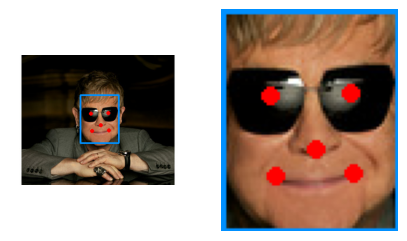

In [43]:
fig, axes = plt.subplots(1, 2, figsize = (5, 3))
axes[0].imshow(image)
axes[0].axis('off')
axes[1].imshow(face)
axes[1].axis('off')
plt.show()

## 2.3 입력형식에 맞게 차원 변환

In [45]:
face.shape
# sol 1
face_data = np.expand_dims(face, axis = 0)
# sol 2 # 비추
# face_data = face.reshape(-1, face.shape[0], face.shape[1], face.shape[2]) 
# sol 3
face_data = face[np.newaxis, :]
face_data.shape

(1, 83, 66, 3)

# 3. Facenet 활용하여 Embedding 데이터로 변환
```
- Embedding 처리란?
얼굴을 표현하는 고차원의 이미지 정보를 저차원으로 변환하면서 필요한 정보를 보존
숫자가 아닌 원 데이터를 Machine learning 모델이 이해하고 상관관계를 분석할 수 있는 연속 값으로 변환

- face_data     : 1 x 83 x 66 x 3
- Embedding Data: 1 x 512
```

In [ ]:
# ! pip install keras-facenet

In [46]:
from keras_facenet import FaceNet
model = FaceNet()

## 3.1 이미지 데이터를 FaceNet Embedding 데이터로 변환


In [48]:
# face_data 얼굴 이미지이거나 얼굴 특징 데이터가 있는 이미지의 유사성을 측정할 수 있는 1 x 512 배열
face_embedding = model.embeddings(face_data)
face_embedding.shape

1/1 [==============================] - 5s 5s/step


(1, 512)

In [49]:
face_embedding[0, :10]

array([-0.00516778,  0.03497617,  0.06088691,  0.11953422,  0.00298368,
        0.04815089, -0.07882894, -0.04683649, -0.05991695, -0.02180289],
      dtype=float32)

# 4. 분류모델을 만들기 위해서 데이터셋 생성
* n은 train 폴더 안의 사진 개수
* m은 test 폴더 안의 사진 개수

```
- X_train(n x 512), y_train(n)
- X_test(m x 512), y_test(m)
```

## 4.1 y_train(사람이름)과 X_train에 사용될 이미지 경로(x_train_path)
- y_test(사람이름)과 X_test에 사용될 이미지 경로(x_test_path)

In [50]:
import os
# 이미지 경로 생성
train_path = 'data/5celebrity/train'
test_path  = 'data/5celebrity/val'

In [63]:
# 하위 디렉토리명, 디렉토리 내 이미지 파일 이름들
list(os.walk(train_path))

[('data/5celebrity/train',
  ['ben_afflek', 'elton_john', 'jerry_seinfeld', 'madonna', 'mindy_kaling'],
  []),
 ('data/5celebrity/train\\ben_afflek',
  [],
  ['httpcsvkmeuaeccjpg.jpg',
   'httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg',
   'httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg',
   'httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg',
   'httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg',
   'httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg',
   'httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg',
   'httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg',
   'httptrwebimgacstanetcxbdddmediasnmediajpg.jpg',
   'httpwwwaceshowbizcomimagesphotobenaffleckjpg.jpg',
   'httpwwwallposterscomimagesPostersPFjpg.jpg',
   'httpwwwfilmscoopitcgibinattoriBENAFFLECKBENAFFLECKjpg.jpg',
   'httpwwwhillsindcomstorebenjpg.jpg',
   'httpwwwrumenewscomwpcontentup

In [84]:
def get_path(path):
    x_path = []
    y      = []
    for x in os.walk(path):
        if len(x[2]) == 0:
            # print(x, '에는 파일이 없네요')
            continue
        name = os.path.basename(x[0]) # basename: 경로의 마지막 이름 구성 요소를 반환
        print(name, '사진', len(x[2]), '장 parsing 중')
        print(x[2])
        for file_name in x[2]:
            # image_full_path = x[0].replace('\\', '/') + '/' + file_name
            image_full_path = path + '/' + name + '/' + file_name
            x_path.append(image_full_path)
            y.append(name)
    # print(len(y))
    # print(len(x_path))
    # for name, path in zip(y, x_path):
    #    print(name, path)
    
    return x_path, y

In [86]:
# get_path(train_path)
x_train_path, y_train = get_path(train_path)
x_test_path, y_test   = get_path(test_path)

ben_afflek 사진 14 장 parsing 중
['httpcsvkmeuaeccjpg.jpg', 'httpimagesfandangocomrImageRendererredesignstaticimgnoxportraitjpgpcpcpcimagesmasterrepositoryperformerimagespjpg.jpg', 'httpssmediacacheakpinimgcomxdbbdbbbececacdecdcdfjpg.jpg', 'httpssmediacacheakpinimgcomxdfdfadcfeabjpg.jpg', 'httpssmediacacheakpinimgcomxedaedabcbefbcbabbjpg.jpg', 'httpssmediacacheakpinimgcomxeebdfdbaaajpg.jpg', 'httpssmediacacheakpinimgcomxeeedcacddeccccacfjpg.jpg', 'httpsuploadwikimediaorgwikipediacommonsthumbddBenAffleckbyGageSkidmorejpgpxBenAffleckbyGageSkidmorejpg.jpg', 'httptrwebimgacstanetcxbdddmediasnmediajpg.jpg', 'httpwwwaceshowbizcomimagesphotobenaffleckjpg.jpg', 'httpwwwallposterscomimagesPostersPFjpg.jpg', 'httpwwwfilmscoopitcgibinattoriBENAFFLECKBENAFFLECKjpg.jpg', 'httpwwwhillsindcomstorebenjpg.jpg', 'httpwwwrumenewscomwpcontentuploadsbenafflekxpng.jpg']
elton_john 사진 16 장 parsing 중
['0.jpg', '1.jpg', '10.jpg', '11.jpg', '12.jpg', '13.jpg', '14.jpg', '15.jpg', '16.jpg', '3.jpg', '4.jpg', '5.jpg'